# Data Loading

In [1]:
# Required Imports
import h5py
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

## Dataset: Electron and Photon

### Data Visualization

In [2]:
# loading the electron and photon data from their separate hdf5 files
def load_dataset():
    with h5py.File("../data/electron_photon_dataset/electron.hdf5", "r") as f:
        ex = np.asarray(f['X'][()], dtype=np.float32)
        ey = np.asarray(f['y'][()], dtype=np.float32)
        
    with h5py.File("../data/electron_photon_dataset/photon.hdf5", "r") as f:
        px = np.asarray(f['X'][()], dtype=np.float32)
        py = np.asarray(f['y'][()], dtype=np.float32)
        
    print(f"Electron dataset shape: X: {ex.shape}, y: {ey.shape}")
    print(f"Photon dataset shape: X: {px.shape}, y: {py.shape}")
    return ex,ey,px,py

ex,ey,px,py = load_dataset()

Electron dataset shape: X: (249000, 32, 32, 2), y: (249000,)
Photon dataset shape: X: (249000, 32, 32, 2), y: (249000,)


The electron and photon images have 32 by 32 pixels with 2 channels; energy and time.

There are 249000 samples in both the classes.

In [3]:
print(f"Max and min of photon image (X): {px.max()}, {px.min()}")
print(f"Max and min of photon label (y): {py.max()}, {py.min()}") # Photon is label 0

print(f"Max and min of electron image (X): {ex.max()}, {ex.min()}")
print(f"Max and min of electron label (y): {ey.max()}, {ey.min()}") # Electron is label 1

Max and min of photon image (X): 2.2779698371887207, -2.512557029724121
Max and min of photon label (y): 0.0, 0.0
Max and min of electron image (X): 2.275660276412964, -2.512557029724121
Max and min of electron label (y): 1.0, 1.0


Photon's class label is 0 and Electron's class label is 1. The image pixels approximately vary from 2 to -2

Following is the plot of a sample Photon and Electron:

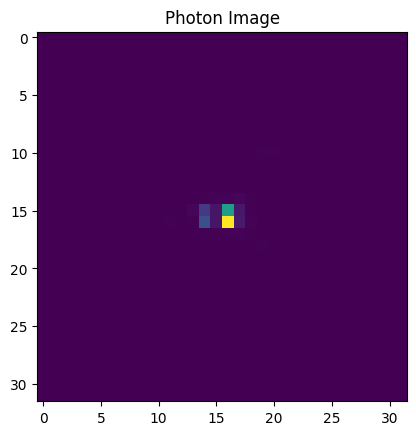

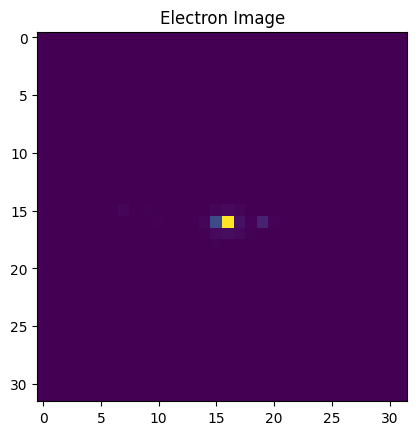

In [4]:
def plot_single_image(data, index, label):
    plt.imshow(data[index, :, :, 0])
    plt.title(f'{label} Image')
    plt.show()

plot_single_image(px, 0, "Photon")
plot_single_image(ex, 0, "Electron")

Following is a sample plot of Photon and Electron's 2 channels and their overlay, in color and graysacale

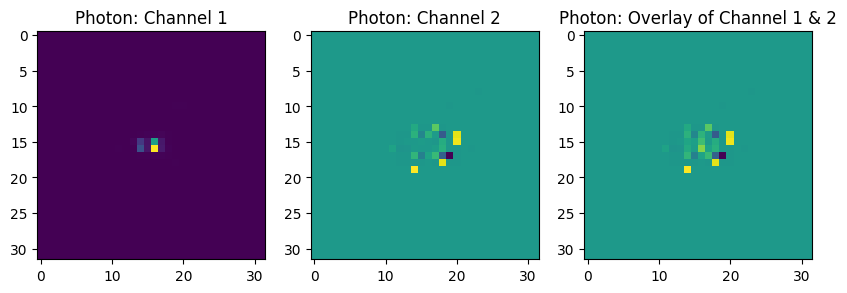

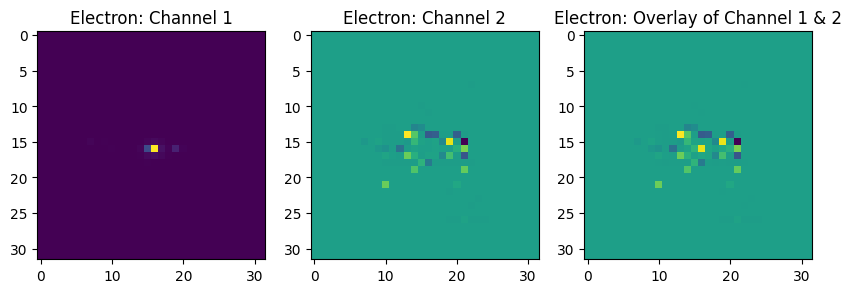

In [5]:
def plot_channels(data, index, label):
    fig, axes = plt.subplots(1, 3, figsize=(10, 5))
    axes[0].imshow(data[index, :, :, 0])
    axes[0].set_title(f'{label}: Channel 1')
    axes[1].imshow(data[index, :, :, 1])
    axes[1].set_title(f'{label}: Channel 2')
    combined = data[index, :, :, 0] + data[index, :, :, 1]
    axes[2].imshow(combined)
    axes[2].set_title(f'{label}: Overlay of Channel 1 & 2')
    plt.show()

plot_channels(px, 0, "Photon")
plot_channels(ex, 0, "Electron")

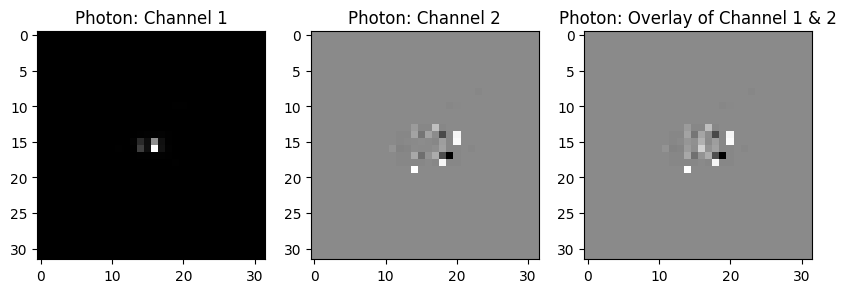

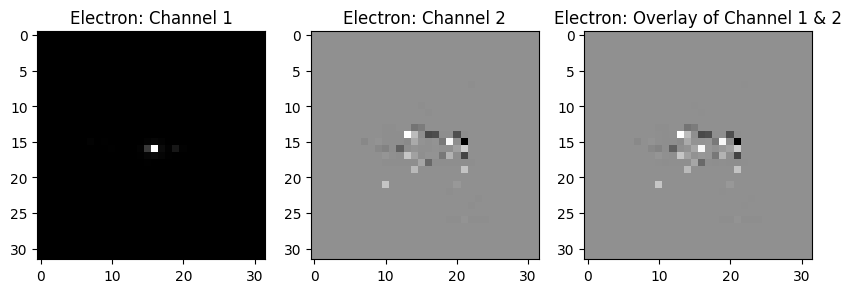

In [6]:
def plot_channels_grayscale(data, index, label):
    fig, axes = plt.subplots(1, 3, figsize=(10, 5))
    axes[0].imshow(data[index, :, :, 0], cmap='gray')
    axes[0].set_title(f'{label}: Channel 1')
    axes[1].imshow(data[index, :, :, 1], cmap='gray')
    axes[1].set_title(f'{label}: Channel 2')
    combined = data[index, :, :, 0] + data[index, :, :, 1]
    axes[2].imshow(combined, cmap='gray')
    axes[2].set_title(f'{label}: Overlay of Channel 1 & 2')
    plt.show()

plot_channels_grayscale(px, 0, "Photon")
plot_channels_grayscale(ex, 0, "Electron")

Following are a couple of samples of Photons and Electrons

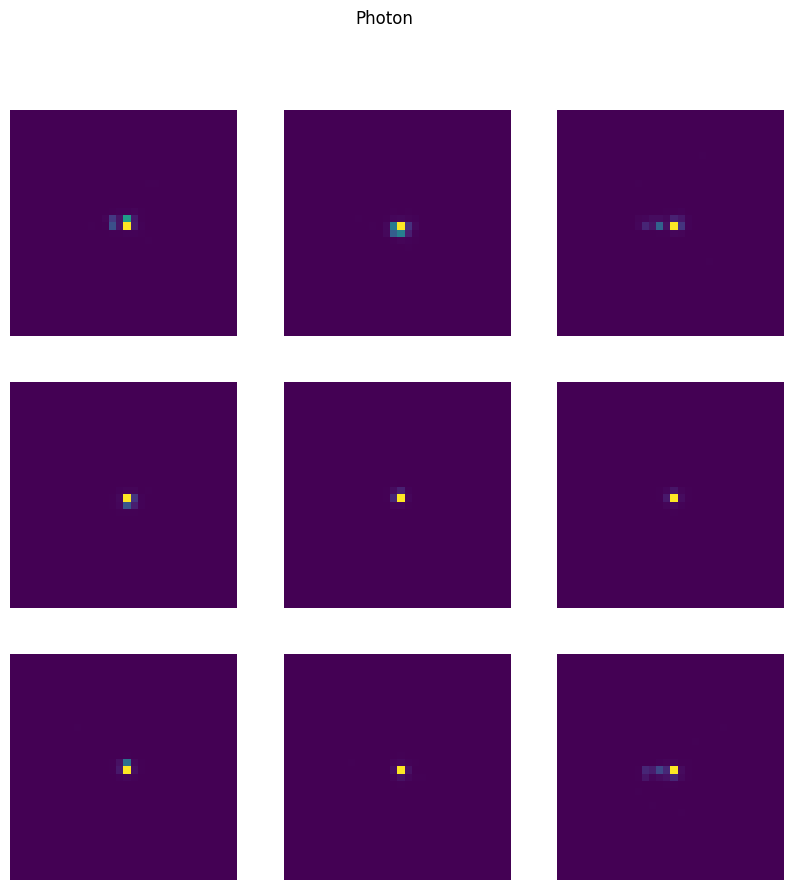

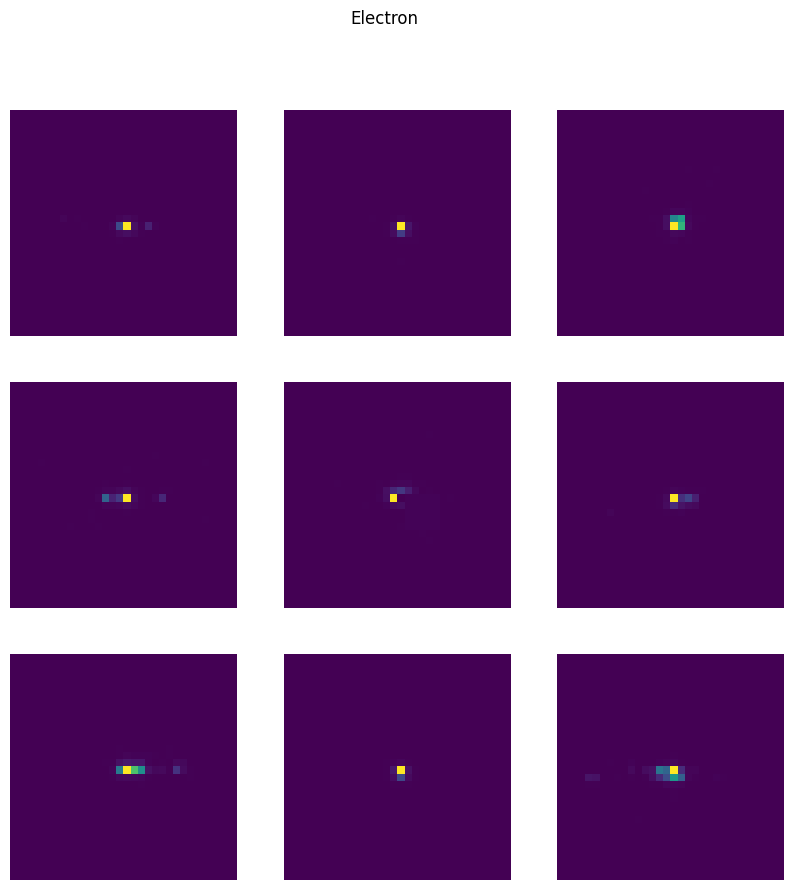

In [7]:
def plot_image_grid(data, label, rows=3, cols=3):
    fig, axes = plt.subplots(rows, cols, figsize=(10, 10))
    for i in range(rows):
        for j in range(cols):
            axes[i, j].imshow(data[i * cols + j, :, :, 0])
            axes[i, j].axis('off')
    plt.suptitle(f'{label}')
    plt.show()

plot_image_grid(px, "Photon")
plot_image_grid(ex, "Electron")

In [8]:
def compute_mean_image(data):
    mean_image = np.mean(data, axis=0)
    return mean_image

mean_px = compute_mean_image(px)
mean_ex = compute_mean_image(ex)

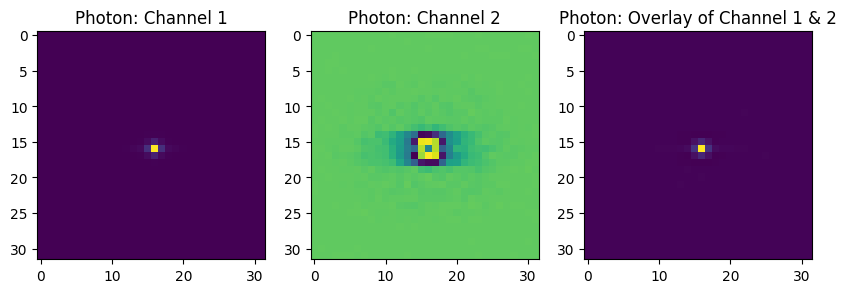

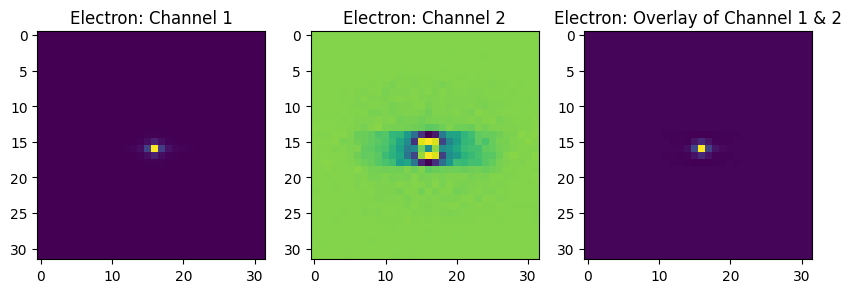

In [9]:
def plot_channels_mean_image(data, label):
    fig, axes = plt.subplots(1, 3, figsize=(10, 5))
    axes[0].imshow(data[:, :, 0])
    axes[0].set_title(f'{label}: Channel 1')
    axes[1].imshow(data[:, :, 1])
    axes[1].set_title(f'{label}: Channel 2')
    combined = data[:, :, 0] + data[:, :, 1]
    axes[2].imshow(combined)
    axes[2].set_title(f'{label}: Overlay of Channel 1 & 2')
    plt.show()

plot_channels_mean_image(mean_px, "Photon")
plot_channels_mean_image(mean_ex, "Electron")

### Saving the data as compressed npz file

In [10]:
# combining x and y of electron and photon
x = np.concatenate((px,ex), axis =0)
y = np.concatenate((py,ey), axis= 0)
del px,ex,py,ey

print(f"Electron-Photon dataset shape: X: {x.shape}, y: {y.shape}")

Electron-Photon dataset shape: X: (498000, 32, 32, 2), y: (498000,)


In [11]:
# Current memory usage (in Mb)
x.nbytes/(1024**2) + y.nbytes/(1024**2)

3892.5247192382812

In [12]:
def reduce_memory_usage(x):
    start_mem = x.nbytes / (1024 ** 2)

    if np.issubdtype(x.dtype, np.integer):
        if x.min() >= np.iinfo(np.int8).min and x.max() <= np.iinfo(np.int8).max:
            x = x.astype(np.int8)
        elif x.min() >= np.iinfo(np.int16).min and x.max() <= np.iinfo(np.int16).max:
            x = x.astype(np.int16)
        elif x.min() >= np.iinfo(np.int32).min and x.max() <= np.iinfo(np.int32).max:
            x = x.astype(np.int32)
    elif np.issubdtype(x.dtype, np.floating):
        if x.min() >= np.finfo(np.float16).min and x.max() <= np.finfo(np.float16).max:
            x = x.astype(np.float16)
        elif x.min() >= np.finfo(np.float32).min and x.max() <= np.finfo(np.float32).max:
            x = x.astype(np.float32)
    
    end_mem = x.nbytes / (1024 ** 2)
    print(f"Mem. usage decreased to {end_mem:.2f} Mb ({100 * (start_mem - end_mem) / start_mem:.1f}% reduction)")
    return x

x = reduce_memory_usage(x)
y = reduce_memory_usage(y)

Mem. usage decreased to 1945.31 Mb (50.0% reduction)
Mem. usage decreased to 0.95 Mb (50.0% reduction)


In [13]:
# Reduced memory usage (in Mb)
x.nbytes/(1024**2) + y.nbytes/(1024**2)

1946.2623596191406

In [14]:
# Shuffling the dataset to remove bias
x, y = shuffle(x,y)

In [15]:
# Splitting the data into train and test
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.20, random_state=42, stratify=y)
print(f"Training Data: {x_train.shape},{y_train.shape}")
print(f"Testing Data: {x_test.shape}, {y_test.shape}")

np.savez_compressed('../data/electron-photon-large.npz', **{
    'x_train': x_train,
    'y_train':y_train,
    'x_test':x_test,
    'y_test':y_test
})

Training Data: (398400, 32, 32, 2),(398400,)
Testing Data: (99600, 32, 32, 2), (99600,)
